In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn.apionly as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')

from ipywidgets import IntSlider, interact

%load_ext autoreload
%autoreload 2

# Correlation

In this 2nd part, we will study the correlation between the ribo and proteins relative concentrations.<br/>
We expect most of them to be correlated since the ribo is the precursor of the protein.<br/>
Our goal is to extract uncorrelated entries for further studies.

### Loading Data

In [3]:
# Unstandardized data
prot_data_without_norm = pd.read_csv('data2/data_prot.csv', index_col=0, header=[0, 1])
ribo_data_without_norm = pd.read_csv('data2/data_ribo.csv', index_col=0, header=[0, 1])
data_without_norm = pd.read_csv('data2/data.csv', index_col=0, header=[0, 1])

# Standardized data (Log2 and z-score)
prot_data = pd.read_csv('data2/data_prot_log2_zscore.csv', index_col=0, header=[0, 1])
ribo_data = pd.read_csv('data2/data_ribo_log2_zscore.csv', index_col=0, header=[0, 1])
data = pd.read_csv('data2/data_log2_zscore.csv', index_col=0, header=[0, 1])

# Log2 data
prot_data_log2 = pd.read_csv('data2/data_prot_log2.csv', index_col=0, header=[0, 1])
ribo_data_log2 = pd.read_csv('data2/data_ribo_log2.csv', index_col=0, header=[0, 1])
data_log2 = pd.read_csv('data2/data_log2.csv', index_col=0, header=[0, 1])

# Diff Log2 data
prot_data_geom = pd.read_csv('data2/data_prot_diff_log2.csv', index_col=0, header=[0, 1])
ribo_data_geom = pd.read_csv('data2/data_ribo_diff_log2.csv', index_col=0, header=[0, 1])
data_geom = pd.read_csv('data2/data_diff_log2.csv', index_col=0, header=[0, 1])

## 0 - First visualization

Before computing any correlation coefficients, we first visualize the evolution of levels of proteins and ribo over time.

### a) Scatter

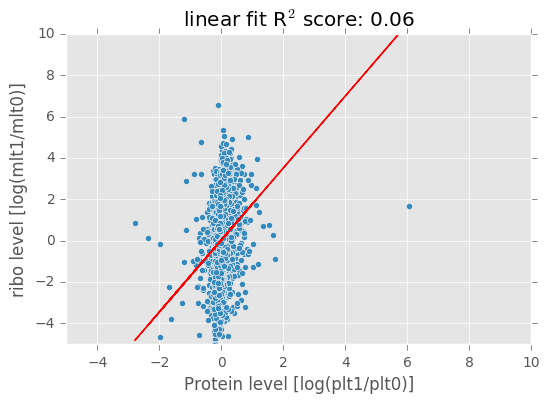

In [4]:
# 

x_min = -5
x_max = 10
y_min = -5
y_max = 10

def plot_relation_scatter(i):
    t = [k for k in [0,1,3,5,7,10]]
    
    # setup linear regression model
    lr = LinearRegression()

    # Fit the data
    x = data_geom.prot['d'+str(t[i])][:, np.newaxis]
    y = data_geom.ribo['d'+str(t[i])][:, np.newaxis]
    lr.fit(x, y)
    score = lr.score(x,y)

    # draw scatter plot
    data_geom.plot(kind='scatter', x=("prot", 'd'+str(t[i])), y=("ribo", 'd'+str(t[i])))
    #data_set.plot(kind='scatter', x='t'+str(t)+'p', y='t'+str(t)+'m')
    
    # plot fit
    plt.plot(x, lr.predict(x), 'r-')
    
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel('Protein level [log(plt'+str(t[i])+'/plt'+str(t[i-1])+')]')
    plt.ylabel('ribo level [log(mlt'+str(t[i])+'/mlt'+str(t[i-1])+')]')
    plt.title('linear fit R$^2$ score: '+str(np.round(score,3)))
    plt.show()

interact(plot_relation_scatter, i=IntSlider(min=1, max=3))
plt.show()

We can observe that the pattern scatters along a diagonal line, which reinforces our belief that the two data sets should be correlated.


### b) Heatmap

Another way to visualize correlations is to use heatmaps. Let's define our plot function :

In [8]:
def plot_heatmap(df, symmask=False, subplot=None):
    if symmask:
        mask_ = np.triu(np.ones(df.shape, dtype=bool),k=1) 
        ax = sns.heatmap(df, annot=True, fmt=".1f", linewidths=0.5, cbar=False, square=True, mask=mask_, ax=subplot)
        ax.set_axis_bgcolor('None')
        #ax.set_facecolor('None')
    else:
        ax = sns.heatmap(df, annot=True, fmt=".1f", linewidths=0.5, cbar=False, square=True, ax=subplot)
    return ax

In [9]:
data_geom.corr()

prot                                              ribo  \
                d1        d3        d5        d7       d10        d1   
prot d1   1.000000 -0.128587 -0.118658 -0.130828 -0.075234  0.245559   
     d3  -0.128587  1.000000  0.250159 -0.211716 -0.210456  0.092989   
     d5  -0.118658  0.250159  1.000000  0.029401 -0.161395 -0.130805   
     d7  -0.130828 -0.211716  0.029401  1.000000  0.183934 -0.103829   
     d10 -0.075234 -0.210456 -0.161395  0.183934  1.000000 -0.028433   
ribo d1   0.245559  0.092989 -0.130805 -0.103829 -0.028433  1.000000   
     d3  -0.129160  0.373231  0.319152 -0.062461 -0.114411 -0.453108   
     d5  -0.085522  0.053636  0.502605  0.140660 -0.020342 -0.284980   
     d7  -0.008682 -0.326572 -0.345022  0.206011  0.291652  0.251350   
     d10 -0.009125 -0.080495 -0.084672 -0.062314  0.063510 -0.323689   

                                                  
                d3        d5        d7       d10  
prot d1  -0.129160 -0.085522 -0.008682 -0.009125  
     d3   0.373231  0.053636 -0.326572 -0.080495  
     d5   0.319152  0.502605 -0.345022 -0.084672  
     d7  -0.062461  0.140660  0.206011 -0.062314  
     d10 -0.114411 -0.020342  0.291652  0.063510  
ribo d1  -0.453108 -0.284980  0.251350 -0.323689  
     d3   1.000000 -0.061050 -0.374504  0.353828  
     d5  -0.061050  1.000000 -0.512781 -0.211952  
     d7  -0.374504 -0.512781  1.000000 -0.264135  
     d10  0.353828 -0.211952 -0.264135  1.000000

Let's compute the heatmap of correlation between all possible pair of stages :

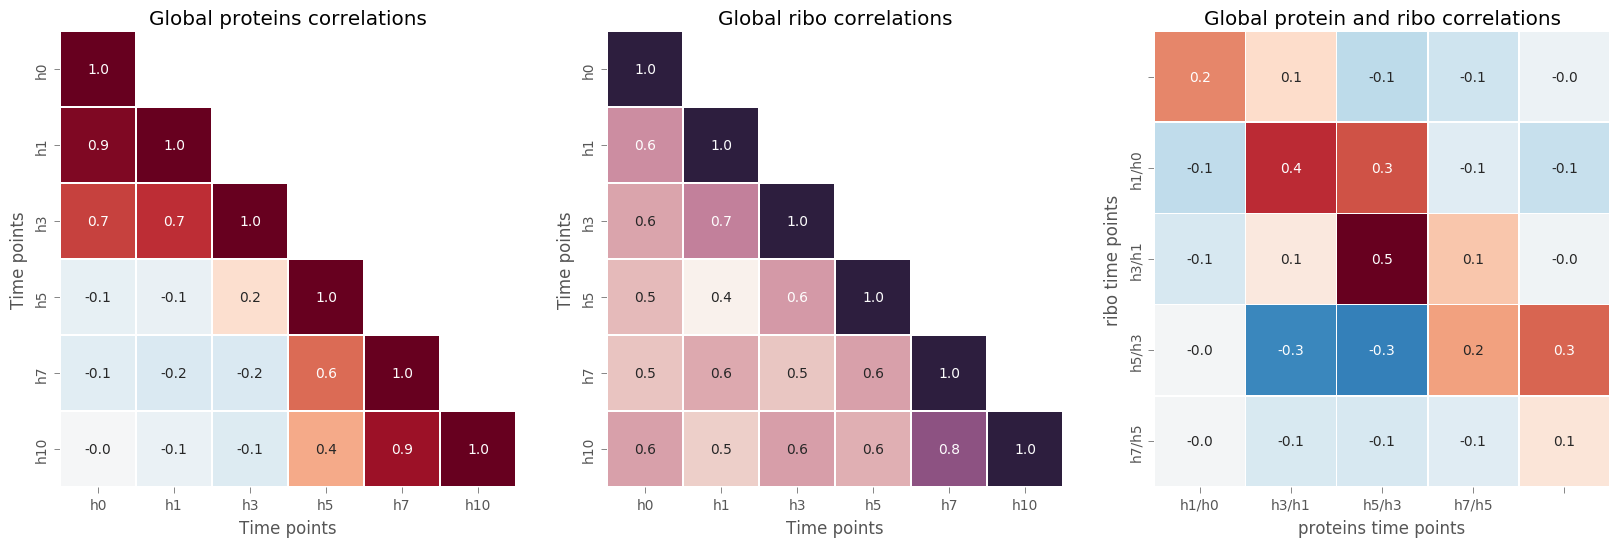

In [10]:
f, axarr = plt.subplots(1, 3, figsize=(20,15))

t = [0,1,3,5,7,10]

# Proteins
axarr[0] = plot_heatmap(prot_data_log2.corr(), symmask=True, subplot=axarr[0])
axarr[0].set_title('Global proteins correlations')
axarr[0].set_xlabel('Time points')
axarr[0].set_ylabel('Time points')
axarr[0].set_xticklabels(['h'+str(k) for k in t])
axarr[0].set_yticklabels(['h'+str(k) for k in reversed(t)])

# ribo
axarr[1] = plot_heatmap(ribo_data_log2.corr(), symmask=True, subplot=axarr[1])
axarr[1].set_title('Global ribo correlations')
axarr[1].set_xlabel('Time points')
axarr[1].set_ylabel('Time points')
axarr[1].set_xticklabels(['h'+str(k) for k in t])
axarr[1].set_yticklabels(['h'+str(k) for k in reversed(t)])

# ribo & proteins
axarr[2] = plot_heatmap(data_geom.corr().iloc[5:10, 0:5], subplot=axarr[2])
axarr[2].set_title('Global protein and ribo correlations')
axarr[2].set_xlabel('proteins time points')
axarr[2].set_ylabel('ribo time points')
axarr[2].set_xticklabels(['h'+str(t[k])+'/h'+str(t[k-1]) for k in range(1,5)])
axarr[2].set_yticklabels(['h'+str(t[k])+'/h'+str(t[k-1]) for k in reversed(range(1,5))])
#axarr[2].set_xticklabels(['h'+str(k) for k in range(11) if k != 9])
#axarr[2].set_yticklabels(['h'+str(k) for k in reversed(range(11)) if k != 9])

plt.show()

- *Global proteins correlations :* <br/>
h0 and h1 seem to be highly correlated, whereas h6, h7, h8 seem to be anti-correlated with h1, h2.
- *Global ribo correlations :*<br/>
The heatmap looks like the proteins one. Thus, we make similar observations.
- *Global protein and ribo correlations :*<br/>
Until we reach t=5h, the ribo level at time t seems to be correlated with protein level at time t+1. That can be interpretated as the delay in protein synthesis.<br/>
Notice that as in our previous plots, correlation is explicit only before t(ribo) = 5h and t(protein)=6h. It corresponds to the time of meiotic nuclear division.

## I - Pearson's correlation Analysis

We can compute the correlation using the Pearson's coefficient :
$$ \text{corr}(X,Y) = \dfrac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} $$

In [11]:
def compute_corr(k):
    """Compute correlation between prot k and ribo k for log2 data"""
    return prot_data_geom.iloc[k]["prot"].corr(ribo_data_geom.iloc[k]["ribo"], method='pearson')

We compute the coefficient for each ribo/protein pair :

In [12]:
correl = np.zeros((data_geom.shape[0],))
for k in range(data_geom.shape[0]):
    correl[k] = compute_corr(k)

corr_ = pd.Series(correl, index=data.index)

Let's plot the result :

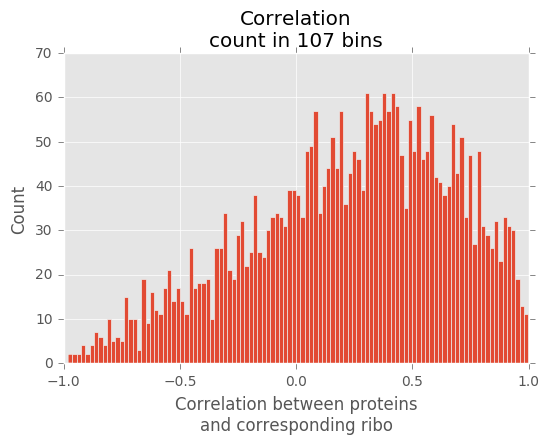

In [13]:
ndata_per_bin = 30 # if uniform
nbins = int(data_geom.shape[0]/ndata_per_bin)

plt.hist(corr_, bins=nbins)
plt.title('Correlation\ncount in '+str(nbins)+' bins')
plt.xlabel('Correlation between proteins\nand corresponding ribo')
plt.ylabel('Count')

plt.show()

In [14]:
print("Averaged correlation : ", corr_.mean())
print("Averaged correlation in absolute value : ", np.abs(corr_).mean())

Averaged correlation :  0.230225784499
Averaged correlation in absolute value :  0.418560836405


Remember that the Pearson correlation values are between **-1** and **1**.
- A correlation of **0** means that the concentrations are **uncorrelated**
- A correlation of **-1** means that the concentrations are **anticorrelated**
- A correlation of **1** means that the concentrations are **correlated**. 

On the graph, we can observe that :
- Few concentrations are anti-correlated.
- A significant number of entries are correlated.
- A lot of entries are not so clearly correlated, and even uncorrelated.

On the whole, the concentrations tends to be correlated, even if the correlation strength can vary.

## II - Concentrations evolution for various correlation degrees

Let's have a quick look at some representative of each type of correlation.<br/>
First of all, we define a plot function which enable to represent the evolution of ribo and protein concentration for one given ribo/protein pair.

In [15]:
def plot_set(k): # k = protein
    
    xticks_ = [0, 1, 3, 5, 7, 10]
    
    if type(k) == int:
        plt.plot(xticks_, prot_data.iloc[k].values, label='Protein')
        plt.plot(xticks_, ribo_data.iloc[k].values, label='ribo')
        plt.title(prot_data.index[k])
    elif type(k) == str:
        plt.plot(xticks_, prot_data.loc[k].values, label='Protein')
        plt.plot(xticks_, ribo_data.loc[k].values, label='ribo')
        plt.title(k)
    else:
        raise NameError('unrecognize input type '+str(type(k)))
    
    plt.xlabel('Time [h]')
    plt.ylabel('Standardized log$_2$ ratio')
    
    plt.xticks(xticks_)
    
    plt.legend()
    plt.show()

In [16]:
prot_data.loc['SPBC21C3.18'].values

array([-0.71716123, -1.00661406, -0.44501729,  1.68876338,  0.63195321,
       -0.151924  ])

### a) Most correlated data

We begin with the most correlated data (coefficient close to 1).

In [17]:
most_correlated = corr_.sort_values().tail(1)
most_correlated

SPAC22F8.10c    0.998407
dtype: float64

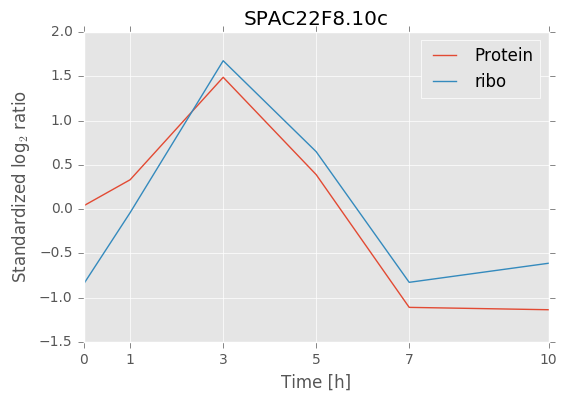

In [18]:
plot_set(most_correlated.index[0])

In this case, the protein level exactly fits the ribo's one. <br/>
It then seems logical that this ribo produces this protein.

### b) Most anticorrelated data

In [19]:
most_anticorrelated = corr_.sort_values().head()
most_anticorrelated

SPBC18E5.12c   -0.980888
SPCC1259.04    -0.978093
SPAC1327.01c   -0.959992
SPAC1786.01c   -0.945365
SPBC947.08c    -0.934153
dtype: float64

There are 2 possible cases of anti-correlation :
- The first one : The protein's level increases whereas the ribo level decreases.
- The second one : The ribo level increases whereas the protein level decreases.

- **1st case** : The protein's level increases whereas the ribo level decreases.

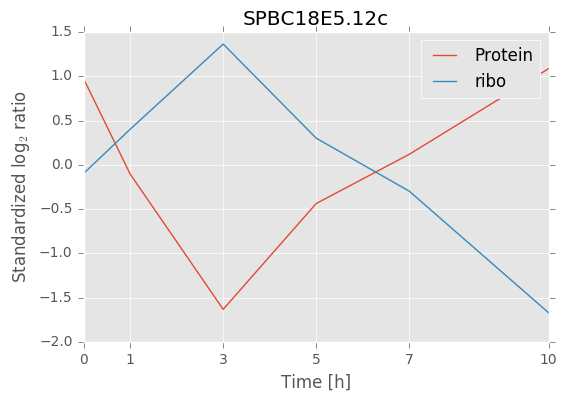

In [20]:
plot_set(most_anticorrelated.index[0])

One possible explanation is that, in some cases, the ribo is destroyed when we have enough proteins (post-transcriptionnal regulation). However, the previously produced proteins are still living, and the remaining ribo keep producing new proteins. 

- **2nd case** : The ribo level increases whereas the protein level decreases.

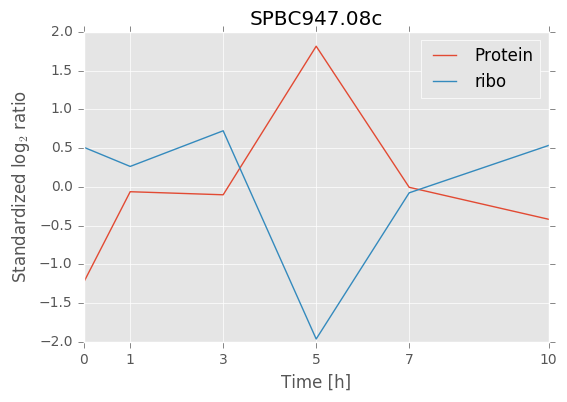

In [21]:
plot_set(most_anticorrelated.index[4])

Again, one possible explanation could be regulatory processes : proteins or ribosomes may have been degragated and thus, the proteins level decreases.

### c) Most uncorrelated data

In [22]:
sym_thr = 0.0004
most_uncorrelated = corr_[np.abs(corr_) <sym_thr]
most_uncorrelated

SPAC1002.08c    0.000185
dtype: float64

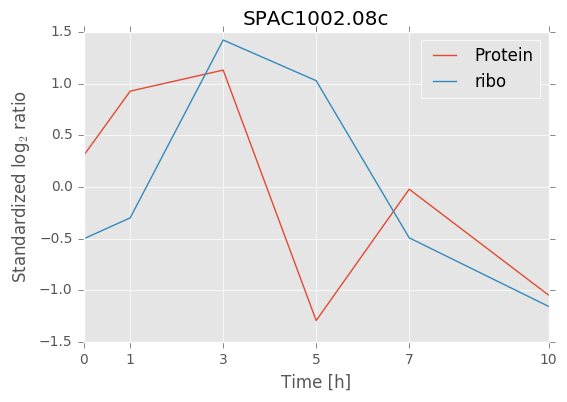

In [23]:
plot_set(most_uncorrelated.index[0]);

### d) For common data

The averaged correlation in absolute value is 0.436.<br/>
Let's have a quick look at the correlated data with a coefficient of 0.4.

In [24]:
common_correlated = corr_[corr_<0.39].sort_values().tail(2)
common_correlated

SPBC56F2.07c    0.388679
SPAC222.14c     0.389921
dtype: float64

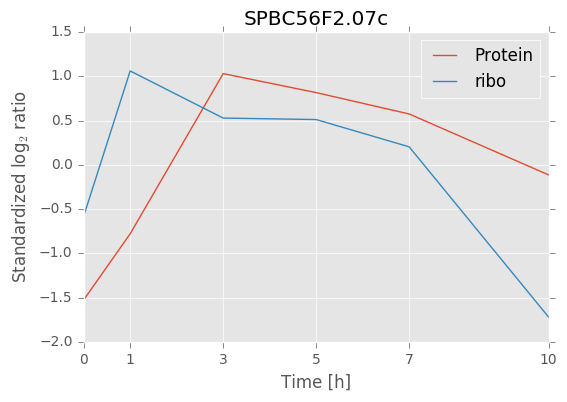

In [25]:
plot_set(common_correlated.index[0])

For this example of correlation coefficient of 0.4, the protein level doesn't fit the ribo level perfectly, but the levels increase and decrease at the "same" time.